In [1]:
# we start by importing the Python libraries that we will be using:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (11, 5)
sns.set(rc = {'figure.figsize':(11,5)})

In [2]:
df = pd.read_csv('../data/kc_house_data.csv') # load database

df.head() # show first 5 entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info() # get a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Cleaning the Data

In [4]:
df = df.iloc[:, 2:8] # select the relevant rows

<AxesSubplot:>

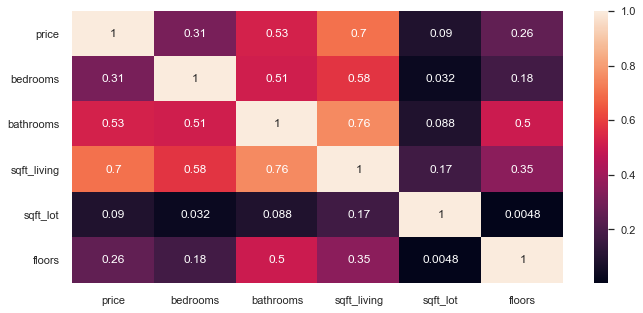

In [5]:
sns.heatmap(df.corr().abs(), annot=True) # run a heatmap to detect possible collinearity

There are some areas of interest and possible multicollinearity in several of our columns

In [6]:
df.describe() # scan our new data for outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000


In [7]:
# one of our houses appears to have 33 bedrooms, let's look into that
df.bedrooms.sort_values(ascending = False).head()

15856    33
8748     11
19239    10
13301    10
15147    10
Name: bedrooms, dtype: int64

In [8]:
df.loc[[15856]] # inspect our first outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
15856,640000.0,33,1.75,1620,6000,1.0


The amount of bedrooms appears to betray the square footing

In [9]:
df.loc[[8748]] # check the second outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
8748,520000.0,11,3.0,3000,4960,2.0


In [10]:
# it would seem safe to drop our highest outliers in this case
df = df[df.bedrooms <= 10] # drop both the outlier rows

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21595 non-null  float64
 1   bedrooms     21595 non-null  int64  
 2   bathrooms    21595 non-null  float64
 3   sqft_living  21595 non-null  int64  
 4   sqft_lot     21595 non-null  int64  
 5   floors       21595 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


## Mean Normalization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler
df_scale = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)  # fit and transform our data as well as making sure our
                                                                        # columns keep their original names
df_scale.head() # check out our new dataframe

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,-0.866668,-0.411551,-1.451026,-0.980612,-0.228194,-0.915545
1,-0.006241,-0.411551,0.174515,0.533383,-0.189752,0.937426
2,-0.980720,-1.519434,-1.451026,-1.427186,-0.123156,-0.915545
3,0.173411,0.696332,1.149840,-0.131032,-0.243889,-0.915545
4,-0.082457,-0.411551,-0.150593,-0.436009,-0.169517,-0.915545


In [13]:
df_scale.describe() # get quick summary stats for our data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.159500e+04,2.159500e+04,2.159500e+04,2.159500e+04,2.159500e+04,2.159500e+04
mean,-1.158190e-16,7.699329e-17,3.158699e-17,-1.474059e-16,-7.896747e-18,1.368770e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.258364e+00,-2.627317e+00,-2.101243e+00,-1.862868e+00,-3.520664e-01,-9.155453e-01
25%,-5.941948e-01,-4.115508e-01,-4.757014e-01,-7.083107e-01,-2.429232e-01,-9.155453e-01
50%,-2.457779e-01,-4.115508e-01,1.745152e-01,-1.854923e-01,-1.806247e-01,1.094021e-02
75%,2.850135e-01,6.963324e-01,4.996235e-01,5.115990e-01,-1.065909e-01,9.374257e-01
max,1.948877e+01,7.343631e+00,7.652006e+00,1.248196e+01,3.951028e+01,3.716882e+00


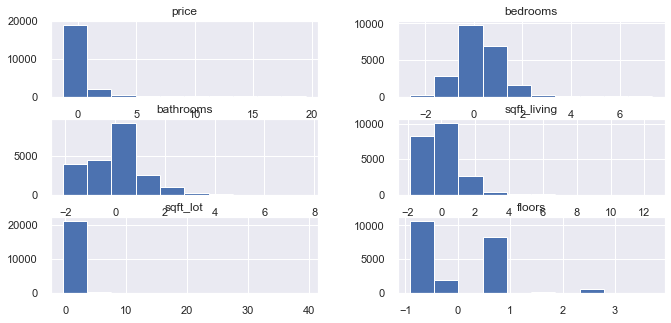

In [14]:
df_scale.hist();

It would appear most of our data isn't normally distributed, except for bedrooms. It is significant to also point out they are all positively skewed.

## Log Transformation

In [15]:
df_log = df.copy() # create a duplicate dataframe to work with

df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


In [16]:
df_log['price'] = np.log(df_log['price']) # perform our transformation onto price

In [17]:
# now we need to perform mean normalization on the rest of our variables
df_log['bedrooms'] = (df_log['bedrooms'] - df_log['bedrooms'].mean()) / df_log['bedrooms'].std()
df_log['bathrooms'] = (df_log['bathrooms'] - df_log['bathrooms'].mean()) / df_log['bathrooms'].std()
df_log['sqft_living'] = (df_log['sqft_living'] - df_log['sqft_living'].mean()) / df_log['sqft_living'].std()
df_log['sqft_lot'] = (df_log['sqft_lot'] - df_log['sqft_lot'].mean()) / df_log['sqft_lot'].std()
df_log['floors'] = (df_log['floors'] - df_log['floors'].mean()) / df_log['floors'].std()

In [18]:
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,12.309982,-0.411541,-1.450993,-0.980589,-0.228188,-0.915524
1,13.195614,-0.411541,0.174511,0.533371,-0.189748,0.937404
2,12.100712,-1.519399,-1.450993,-1.427153,-0.123153,-0.915524
3,13.311329,0.696316,1.149813,-0.131029,-0.243883,-0.915524
4,13.142166,-0.411541,-0.150590,-0.435999,-0.169513,-0.915524


<AxesSubplot:>

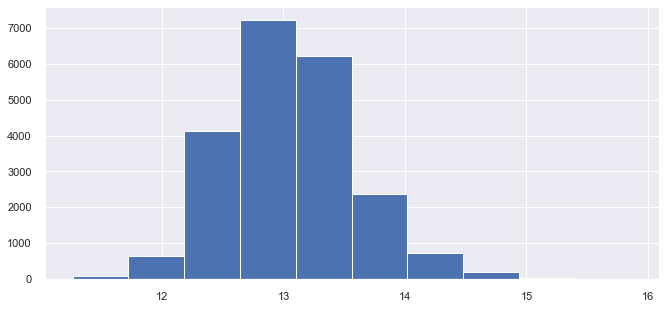

In [19]:
df_log.price.hist()

Look at how normal and nice it looks! Let's use this from now on.


## More Plotting

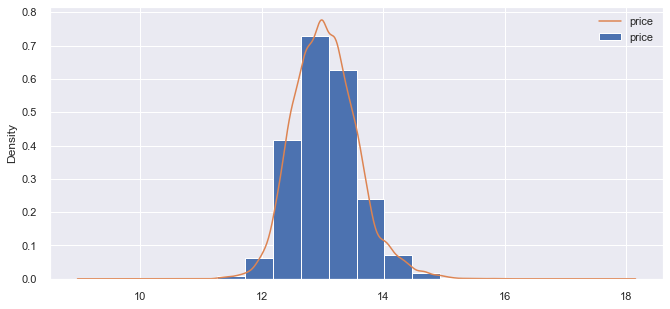

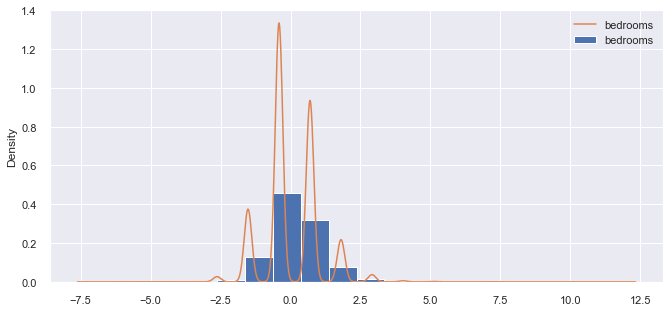

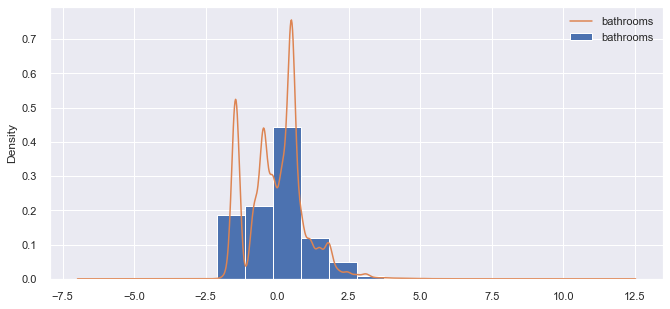

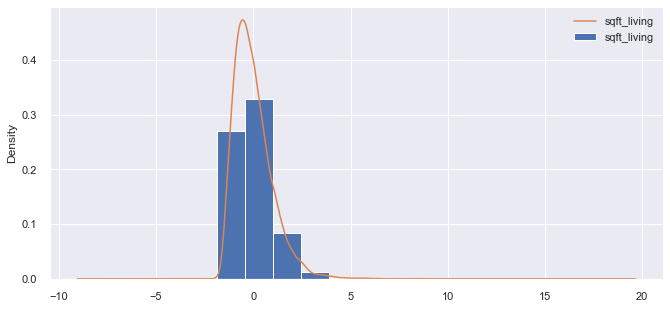

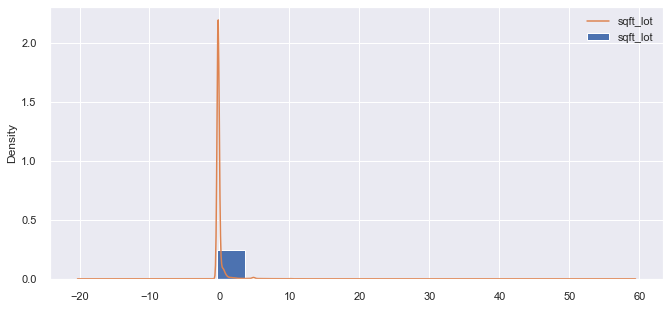

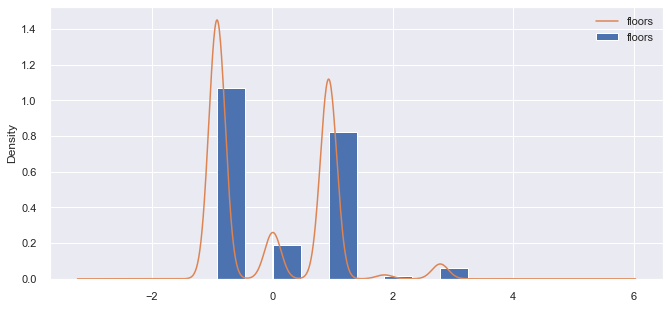

''

In [20]:
new = list(df_log) # creating a list of columns from our scaled data

for column in new: # for loop to iterate through our list for plotting
    df_log[column].plot.hist(density=True) # make histogram
    df_log[column].plot.kde(label=column) # make KDE plot
    plt.legend() # show legend for each plot
    plt.show()
;

The KDE Plot makes it a lot easier to see how our data is distributed. With this type of plot we can see that our data is slightly more normalized that previously, especially bedrooms.

## Modeling and Regression

In [30]:
column_names = df_log.describe().columns

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, val in enumerate(column_names):
    print("price~" + val) # labeling our results with their respective values
    f = 'price~' + val # initialize our formula
    model = smf.ols(formula=f, data=df_log).fit() # fitting our line
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]}) # make a DF with min and max values of our date
    preds = model.predict(X_new) # create and store our prediction
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]]) # add each values data to our results
    print(results[idx+1]) # view our results
    print(model.summary()) # shows the regression diagnostics summary

price~price
['price', 1.0, -2.883457361768649e-14, 1.0000000000000018, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.092e+32
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:00:17   Log-Likelihood:             6.7901e+05
No. Observations:               21595   AIC:                        -1.358e+06
Df Residuals:                   21593   BIC:                        -1.358e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [36]:
pd.DataFrame(results) # a nice table holding our results

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,-2.88346e-14,1,0
2,bedrooms,0.123459,13.0482,0.185021,0
3,bathrooms,0.303906,13.0482,0.290288,0
4,sqft_living,0.483325,13.0482,0.366083,0
5,sqft_lot,0.0100069,13.0482,0.0526756,3.76091e-49
6,floors,0.0965108,13.0482,0.163586,0


We have pretty low R^2 data here, which indicates the percentage of the variance in our target variable (price).

Our P-values are all low (below 0.05) which is appreciated because it shows our results are significant.

In [46]:
column_names2 = df_log.drop(['price'], axis=1)

f2 = 'price~' + ' + '.join(column_names2)  # defining our formula
mod = smf.ols(formula=f2, data=df_log) # run an OLS regression on our model overall
mod.fit().summary() # fit and summarize data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     4229.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:23:26   Log-Likelihood:                -9418.3
No. Observations:               21595   AIC:                         1.885e+04
Df Residuals:                   21589   BIC:                         1.890e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0482      0.003   5122.646      0.000      13.043      13.053
bedrooms       -0.0530      0.003    -16.393      0.000      -0.059      -0.047
bathrooms       0.0240      0.004      5.604      0.000       0.016       0.032
sqft_living     0.3708      0.004     87.854      0.000       0.363       0.379
sqft_lot       -0.0118      0.003     -4.547      0.000      -0.017      -0.007
floors          0.0299      0.003     10.083      0.000       0.024       0.036
==============================================================================
Omnibus:                        9.642   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.626
Skew:                           0.049   Prob(JB):                      0.00813
Kurtosis:                       3.032   Cond. No.                         3.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""